In [95]:
import DPP_csv as DPP
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [96]:
data_dir = input("Enter the filepath of the csv file: ")

Enter the filepath of the csv file: dataOut.csv


In [97]:
data_frac = float(input("Enter the fraction(0 to 1) of the data to be collected: "))
if not 0< data_frac <=1:
    print("Invalid fraction. Default of 30% of data will be used.")
    data_frac = 0.2
data_frac = data_frac * 100
print("%.2f %% of data will be used."% data_frac)
dpp = DPP.DPP_csv(data_dir)
df,chosen_attributes = dpp.get_data(data_frac = data_size)

Enter the fraction(0 to 1) of the data to be collected: 0.8
80.00 % of data will be used.
667
1 motionGravityY
2 motionGravityZ
3 motionGravityX
4 motionRotationRateZ
5 gyroRotationY
6 motionRotationRateY
7 gyroRotationX
8 motionRotationRateX
9 gyroRotationZ
10 gyroTimestamp
11 motionMagneticFieldY
12 magneticFieldX
13 magneticFieldY
14 motionMagneticFieldZ
15 motionMagneticFieldX
16 magneticFieldZ
17 motionMagneticFieldCalibrationAccuracy
18 locationCourse
19 locationHorizontalAccuracy
20 locationHeadingY
21 locationLongitude
22 locationVerticalAccuracy
23 locationSpeed
24 locationTrueHeading
25 locationAltitude
26 locationTimestamp
27 locationLatitude
28 locationHeadingTimestamp
29 locationHeadingX
30 locationMagneticHeading
31 locationHeadingZ
32 locationHeadingAccuracy
33 accelerometerAccelerationX
34 motionUserAccelerationX
35 accelerometerTimestamp
36 motionUserAccelerationZ
37 accelerometerAccelerationZ
38 accelerometerAccelerationY
39 motionUserAccelerationY
40 orientationAzimu

In [98]:
n_clusters = int(input("Enter the number of clusters: "))
kmeans = KMeans(n_clusters)
kmeans.fit(np.array(df))
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Enter the number of clusters: 4


In [99]:
X = np.array(df)
X_w_centroids = np.concatenate((X,centroids),axis=0)
init_dim = len(df.columns)
red_dim = 2

In [100]:
import Sachin_som_with_TF as som
import tsne

som_data = np.copy(X_w_centroids)
tsne_data = np.copy(X_w_centroids)

In [101]:
som = som.SOM(20,20,init_dim,200)
som.train(X_w_centroids)
print("SOM training is done.")
mapped = np.array(som.map_vects(som_data))
som_redu_centroids = mapped[-n_clusters:]
som_wo_centroids = mapped[:-n_clusters]

SOM training is done.


In [102]:
tsne_w_centroids = tsne.tsne(X_w_centroids,red_dim,init_dim,30.0)
print("tSNE training is done.")
tsne_redu_centroids = tsne_w_centroids[-n_clusters:]
tsne_wo_centroids = tsne_w_centroids[:-n_clusters]

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  671 ...
Computing P-values for point  500  of  671 ...
Mean value of sigma:  0.790242156862
Iteration  200 : error is  0.207104068246
Iteration  400 : error is  0.172572673553
Iteration  600 : error is  0.166044941297
Iteration  800 : error is  0.162962394679
Iteration  1000 : error is  0.16110099802
tSNE training is done.


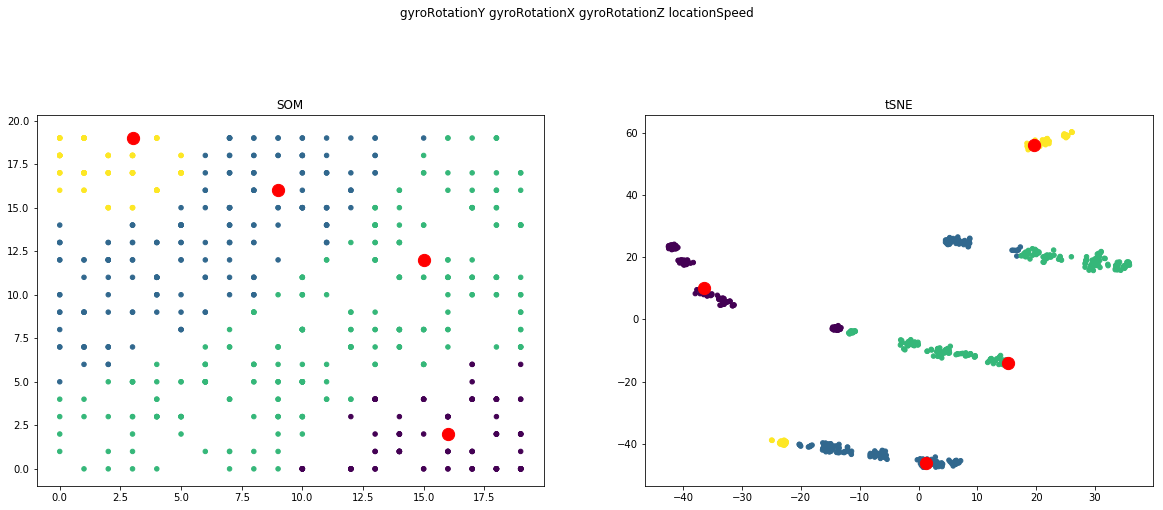

In [103]:
plt.figure(figsize=(20, 15))
title = " ".join(chosen_attributes)
plt.suptitle(title)

plt.subplot(221)
plt.scatter(som_wo_centroids[:,0],som_wo_centroids[:,1],20,labels)
plt.scatter(som_redu_centroids[:,0],som_redu_centroids[:,1],150,'r')
plt.title("SOM")

plt.subplot(222)
plt.scatter(tsne_wo_centroids[:,0],tsne_wo_centroids[:,1],20,labels)
plt.scatter(tsne_redu_centroids[:,0],tsne_redu_centroids[:,1],150,'r')
plt.title("tSNE")

plt.show()


SyntaxError: unexpected EOF while parsing (<ipython-input-92-2f53fe4d55eb>, line 1)